# Estimating errors between two trajectories

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import validator as validator

## Useful functions
### How to test a solution?

In [2]:
def solution(X, Y):
    return np.abs(np.trapz(*X.transpose()[::-1]) - np.trapz(*Y.transpose()[::-1]))

In [3]:
np.loadtxt("test/[test0]simple.txt", skiprows=0, max_rows=2, unpack=True, delimiter=',')

array([[0., 0.],
       [1., 0.],
       [2., 1.],
       [3., 1.],
       [4., 0.]])

In [4]:
validator.test(solution, display = False, samples_range = slice(0, 5))

[test0]simple.txt	ok 	 The expected value is indeed 9.0

[test1]negative.txt	ok 	 The expected value is indeed 10.0

[test2]simple2.txt	ok 	 The expected value is indeed 29.325000000000003

[test3]intersection.txt	NOT ok 	 The expected value is 63.4, but the output value is 8.5.

[test4]poor_sided.txt	NOT ok 	 The expected value is 17.0, but the output value is 31.0.



False

### Distance between two points

In [5]:
dist = lambda P, Q : np.sqrt(np.sum((P-Q)**2 ))

def dist_to_line(A1, A2, B):
    """ distance from B to line (A1A2)"""
    # equation of the line (A1A2) is defined as by = ax + c
    b, a = A2 - A1
    c = b*A1[1] - a*A1[0]
    return abs(b*B[1] - a*B[0] - c)/np.hypot(a, b)

# def slope(A, B):
#     """ returns slope of the line (AB) """
#     return (B[1] - A[1]) / (B[0] - A[0])

def orientation(A, B, C):
    """ Return 1 if Counterclockwise (and colinear)??, -1 if clockwise """
    r = (B[1] - A[1]) * (C[0] - B[0]) - (C[1] - B[1]) * (B[0] - A[0])
    return 1 if r >=0 else -1 # TODO r >= 0 OR r > 0 ?????? (r = 0 => colinear)

### Finding the intersection point of two line segments
Let $p_1$ and $p_2$ be the (2D) endpoints of one segment and let $q_1$ and $q_2$ be the endpoints of the other. A parametrization of these lines are defined as:
$$
\left\{\begin{array}{l}{p_{1}+t_p\left(p_{2}-p_{1}\right)} \\ {p_{3}+t_q\left(p_{4}-p_{3}\right)}\end{array}\right.
$$
where $t_p, t_q \in [0,1]$. Thus, the segments intersect iff there exists $(s,t)$ such that:
$$p_1+t_p(p_2-p_1) = q_1+t_q(q_2-q_1)$$
i.e.
$$t_q(q_2-q_1) + t_p(p_1-p_2) = p_1 - q_1$$
We can define our system using matrices ($p_1$, $p_2$, $q_1$, $q_2$ being a column vector of size 2) :
$$
\underbrace{\left[
    \begin{array}{ll}
        q_2-q_1 & p_1-p_1\end{array}
\right]}_A \times 
\underbrace{\left[
    \begin{array}{l}
        t_q \\ t_p\end{array}
\right]}_T = 
\underbrace{\left[
    \begin{array}{ll}
        p_1 & q_1\end{array}
\right]}_B
$$
* if a solution $(t_p, t_q)$ exists and is in $[0,1]\times[0,1]$, the segments intersect (at $p_{1}+t_p(p_{2}-p_{1})$).
* if A is not inversible, the segments have the same slope (we need to test if segments are colinear or parallel)

In [35]:
def find_intersection(p1, p2, q1, q2, display = False):
    """ Find intersection point between [p1, p2] and [q1, q2] 
    Parameters :
        - p1, p2, q1, q2 : np.ndarrays of shape (2,)
    Returns : the coordinates of the intersection points,  
        if the line segments intersect
    
    [TODO] Manage the case where the matrix is singular
    """
    a = np.array([q2-q1, p1-p2]).transpose()
    if display:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], '-o')
        plt.plot([q1[0], q2[0]], [q1[1], q2[1]], '-o')
    if np.linalg.det(a): # if a is invertible (if lines intersect)
        b = p1 - q1
        t = np.linalg.solve(a,b)
        if np.all(0 < t) and np.all(t < 1): # segments intersect
            intersection = p1 + t[1]*(p2-p1)
            if display:
                plt.plot(*(intersection), 'o')
            return intersection 
    else: # TODO ?
        pass
    return None

True


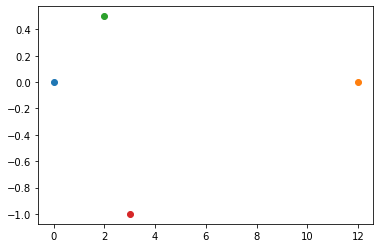

In [44]:
p1, p2, q1, q2 = np.array([0,0]), np.array([12, 0]), np.array([2, 0.5]), np.array([3, -1])
plt.plot(*p1,'o', *p2, 'o', *q1, 'o', *q2, 'o')
intersect = find_intersection(p1, p2, q1, q2)
print(np.all(intersect != None))

### Suite ..

In [7]:
# coder intersections

---
## Solution 1 - Bases triangulaires

In [16]:
# T # trajectory , two colums matrix 
# P # path follown, two colums matrix

#lgT=len(T), lgP=len(P),depMin=min (T[0][0], P[0][0]),endMin=min (T[lgT][0], P[LgP][0])


# interval  of  computing is [depmin, endMin]

# determination of the intervall lenght for calculation

def lengI(T,P):
    d1=0
    d2=0
    for i in range (len(P[:, 0])+1):
        if len(P[:, 0])>d1:
            d1=P[:, 0][i]
    for i in range (len(T[:, 0])+1):
        if T[:, 0][i]>d2:
            d2=T[:, 0][i]
    return min (d1,d2)
T=np.array([[0,0],[1,0],[2,1],[3,1],[4,0]])
P=np.array([[0,3],[1,3],[2,2],[3,2],[4,5]])

lengI(T,P)


IndexError: index 5 is out of bounds for axis 0 with size 5

In [9]:
T=np.array([[0,0],[1,0],[2,1],[3,1],[4,0]])
P=np.array([[0,3],[1,3],[2,2],[3,2],[4,5]])
len(P[:, 0])
d1=0
for i in range len(P[:, 0]):
        if P[:, 0][i]>d1:
            d1=P[:, 0][i]



SyntaxError: invalid syntax (<ipython-input-9-b0f2daa9d8ba>, line 5)

---
## Solution 2 - Pivots

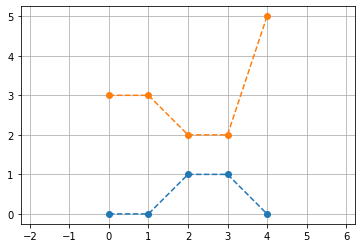

In [11]:
from matplotlib.patches import Polygon
from matplotlib.ticker import MaxNLocator

testname = "test/[test0]simple.txt"
X = np.loadtxt(testname, skiprows=0, max_rows=2, unpack=True, delimiter=',')
Y = np.loadtxt(testname, skiprows=2, max_rows=2, unpack=True, delimiter=',')

plt.figure()
plt.plot(*X.transpose(), '--o', *Y.transpose(), '--o')
plt.axis("equal")
plt.grid()
plt.show()

In [12]:
def find_next_focus_point1(p1, p2, q1, q2):
    """
    The closest point (p2 or q2) to the two current points (p1 or q1)
    Returns: True if p2 is the next focus point, False if q2
    """
    return min(dist(p2, p1), dist(p2, q1)) < min(dist(q2, p1), dist(q2, q1)) #p2 is the closest point

def find_next_focus_point2(p1, p2, q1, q2):
    """
    The closest point (p2 or q2) to its respective point (p1 or q1)
    """
    return dist(p2, p1) < dist(q2, q1) #p2 is the closest point
    
def find_next_focus_point3(p1, p2, q1, q2):
    """
    distance between p2 (or q1) and the line (p1q1) 
    """
    return dist_to_line(*(p1, q1), p2) < dist_to_line(*(p1, q1), q2)


def find_next_focus_point4(p1, p2, q1, q2, oldpoint):
    """
    distance between p2 (or q1) and the line (p1q1) 
    """
    wrong_side = orientation(p1, q1, oldpoint)
    if orientation(p1, q1, p2) == wrong_side:
        return False
    elif orientation(p1, q1, q2) == wrong_side:
        return True
    else:
        return dist_to_line(*(p1, q1), p2) < dist_to_line(*(p1, q1), q2)

In [13]:
NTRIANGLE = 0
def triangle_area(A, B, C, ax):
    global NTRIANGLE
    NTRIANGLE += 1
    ax.add_patch(Polygon([A, B, C], facecolor=["grey", "lightgrey"][NTRIANGLE % 2], ec = "black", alpha = 0.3))
    return 0.5 * abs((B[0]-A[0])*(C[1]-A[1]) - (C[0]-A[0])*(B[1]-A[1]))

We are defining `si` and `tj` instead of simply using `S[i]` and `T[j]`, in order to be capable of redefining these points in the case of intersection.

In [75]:
def error_btw_trajectories(S, T):
    i, j = 0, 0 # i (or j) is the index of the current point along S (or T)
    si, tj = S[i], T[j]
    plt.figure()
    plt.plot(*S.transpose(), '-o', *T.transpose(), '-o')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    #     plt.axis("equal")
    plt.grid()
    error, old_point = 0, S[0]
    while i < len(S) - 1 and j < len(T) - 1:
        print(i, j, si, S[i+1], tj, T[j+1])
        intersect = find_intersection(si, S[i+1], tj, T[j+1])
        if np.all(intersect != None): # if the segments [S_i, S_i+1] and [T_i, T_i+1] intersect
            # Compute area of the triangle intersect, si, tj
            error += triangle_area(si, tj, intersect, ax)
            old_point = si # TODO : is this a good idea ??????????
            si, tj = intersect, intersect
            plt.plot(*intersect, 'og')
            print("intersection")
        else:
            if find_next_focus_point3(si, S[i+1], tj, T[j+1]):
                old_point = si
                si, i = S[i+1], i+1
            else:
                old_point = tj
                tj, j = T[j+1], j+1
            # Compute area of the triangle old_point, si, tj
            error += triangle_area(old_point, si, tj, ax)
#         print(i, j, error)
    
    if i == len(S) - 1:
        error += triangle_area(si, tj, T[j+1], ax)
        j += 1
        for j in range(j, len(T)-1):
            error += triangle_area(si, T[j], T[j+1], ax)
    elif j == len(T) - 1: #else ?
        error += triangle_area(tj, si, S[i+1], ax)
        i += 1
        for i in range(i, len(S)-1):
            error += triangle_area(tj, S[i], S[i+1], ax)
    plt.show()
    return error

[test0]simple.txt	0 0 [0. 0.] [1. 0.] [0. 3.] [1. 3.]
0 1 [0. 0.] [1. 0.] [1. 3.] [2. 2.]
1 1 [1. 0.] [2. 1.] [1. 3.] [2. 2.]
1 2 [1. 0.] [2. 1.] [2. 2.] [3. 2.]
2 2 [2. 1.] [3. 1.] [2. 2.] [3. 2.]
2 3 [2. 1.] [3. 1.] [3. 2.] [4. 5.]
3 3 [3. 1.] [4. 0.] [3. 2.] [4. 5.]


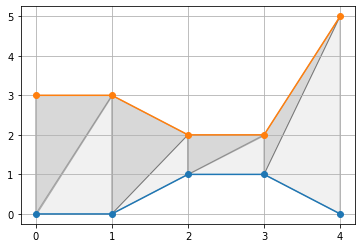

ok 	 The expected value is indeed 9.0

[test1]negative.txt	0 0 [ 0. -2.] [ 1. -3.] [0. 1.] [1. 0.]
0 1 [ 0. -2.] [ 1. -3.] [1. 0.] [ 2. -1.]
0 2 [ 0. -2.] [ 1. -3.] [ 2. -1.] [3. 3.]
1 2 [ 1. -3.] [ 2. -3.] [ 2. -1.] [3. 3.]
1 3 [ 1. -3.] [ 2. -3.] [3. 3.] [4. 1.]
2 3 [ 2. -3.] [3. 1.] [3. 3.] [4. 1.]
3 3 [3. 1.] [ 4. -2.] [3. 3.] [4. 1.]


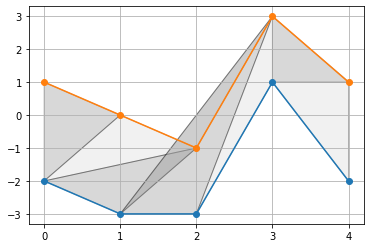

NOT ok 	 The expected value is 10.0, but the output value is 12.0.

[test2]simple2.txt	0 0 [0. 3.] [2.  1.5] [ 0. -2.] [ 2. -5.]
0 1 [0. 3.] [2.  1.5] [ 2. -5.] [ 4.5 -2. ]
1 1 [2.  1.5] [4.5 1. ] [ 2. -5.] [ 4.5 -2. ]
1 2 [2.  1.5] [4.5 1. ] [ 4.5 -2. ] [ 5. -4.]
1 3 [2.  1.5] [4.5 1. ] [ 5. -4.] [ 6. -2.]
1 4 [2.  1.5] [4.5 1. ] [ 6. -2.] [ 6.5 -2.2]


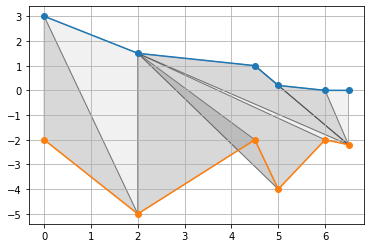

NOT ok 	 The expected value is 29.325, but the output value is 32.574999999999996.

[test3]intersection.txt	0 0 [16. 10.] [18.  9.] [17. 15.] [18. 16.]
0 1 [16. 10.] [18.  9.] [18. 16.] [18. 19.]
0 2 [16. 10.] [18.  9.] [18. 19.] [19. 15.]
0 3 [16. 10.] [18.  9.] [19. 15.] [21. 15.]
0 4 [16. 10.] [18.  9.] [21. 15.] [21.2 10. ]
1 4 [18.  9.] [19.3 11. ] [21. 15.] [21.2 10. ]
2 4 [19.3 11. ] [20. 19.] [21. 15.] [21.2 10. ]
2 5 [19.3 11. ] [20. 19.] [21.2 10. ] [26. 10.]


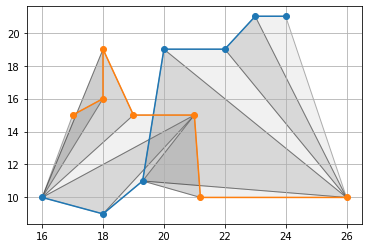

NOT ok 	 The expected value is 63.4, but the output value is 84.1.

[test4]poor_sided.txt	0 0 [10.  5.] [16.  5.] [10.  8.] [12.  7.]
0 1 [10.  5.] [16.  5.] [12.  7.] [14.  8.]
0 2 [10.  5.] [16.  5.] [14.  8.] [16.  7.]
0 3 [10.  5.] [16.  5.] [16.  7.] [18.  9.]


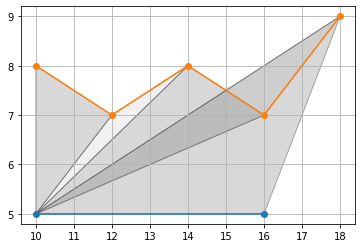

NOT ok 	 The expected value is 17.0, but the output value is 25.0.

[test5]one_point.txt	

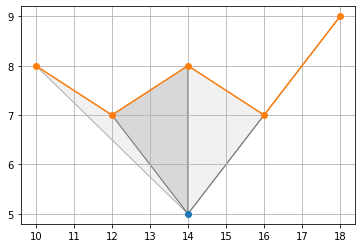

ok 	 The expected value is indeed 7.0

[test6].txt	0 0 [0. 0.] [12.  0.] [0. 1.] [1. 1.]
0 1 [0. 0.] [12.  0.] [1. 1.] [2.  0.5]
0 2 [0. 0.] [12.  0.] [2.  0.5] [ 3. -1.]
intersection
0 2 [2.33333333 0.        ] [12.  0.] [2.33333333 0.        ] [ 3. -1.]
0 3 [2.33333333 0.        ] [12.  0.] [ 3. -1.] [ 4. -1.]
0 4 [2.33333333 0.        ] [12.  0.] [ 4. -1.] [ 5. -1.]
0 5 [2.33333333 0.        ] [12.  0.] [ 5. -1.] [4.5 0.5]
intersection
0 5 [4.66666667 0.        ] [12.  0.] [4.66666667 0.        ] [4.5 0.5]
0 6 [4.66666667 0.        ] [12.  0.] [4.5 0.5] [4. 1.]
0 7 [4.66666667 0.        ] [12.  0.] [4. 1.] [6. 1.]
0 8 [4.66666667 0.        ] [12.  0.] [6. 1.] [ 7.  -0.7]
intersection
0 8 [6.58823529 0.        ] [12.  0.] [6.58823529 0.        ] [ 7.  -0.7]
0 9 [6.58823529 0.        ] [12.  0.] [ 7.  -0.7] [ 8. -1.]
0 10 [6.58823529 0.        ] [12.  0.] [ 8. -1.] [ 9. -1.]
0 11 [6.58823529 0.        ] [12.  0.] [ 9. -1.] [10.  -0.5]
0 12 [6.58823529 0.        ] [12.  0.] [10.  -0.5]

/home/jean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


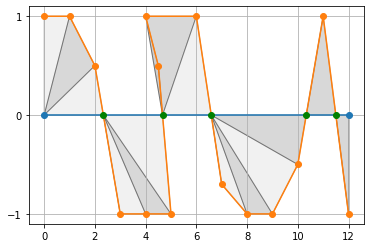

NOT ok 	 The expected value is 17.0, but the output value is 9.704901960784312.



False

In [76]:
validator.test(error_btw_trajectories)

In [73]:
L = [5, 8, 9, 5, 6]
T = sorted(L)
print(T[slice(0, 5)])

[5, 5, 6, 8, 9]
